## –ö–º-4
1. –°—Ä–µ–¥—Å—Ç–≤–∞–º–∏ SymPy —Ä–µ—à–∏—Ç—å —Å–∏—Å—Ç–µ–º—É –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö —É—Ä–∞–≤–Ω–µ–Ω–∏–π
$\frac{{d^2}x(t)}{dt^2} = x(t) + y(t)$ , $\frac{{d^2}y(t)}{dt^2} = x(t) - y(t)$ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ ùë° ‚àà [0,1] –∏ –ø—Ä–∏ —É—Å–ª–æ–≤–∏—è—Ö: ùë•(0) = 1, ùë•‚Ä≤(0) = 1, ùë¶(1) = 1, ùë¶‚Ä≤(1) = 0
–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ ùë•(ùë°), ùë¶(ùë°).

2. –ù–∞ –∑–∞–Ω—è—Ç–∏–∏ –º—ã –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∏ –æ—Ç–∫—Ä—ã—Ç—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ —ç–ø–∏–¥–µ–º–∏–∏ Covid-19. –ó–∞–≥—Ä—É–∑–∏—Ç–µ –∞–∫—Ç—É–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ worldometer –≤ DataFrame. –£–ø–æ—Ä—è–¥–æ—á–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –ø–æ —á–∏—Å–ª—É –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π –Ω–∞ –º–∏–ª–ª–∏–æ–Ω –∂–∏—Ç–µ–ª–µ–π. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã—Ö —Å—É–º–º –¥–ª—è —ç—Ç–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è, —á–∏—Å–ª–∞ —Ç–µ—Å—Ç–æ–≤ –Ω–∞ –º–∏–ª–ª–∏–æ–Ω –∂–∏—Ç–µ–ª–µ–π, —á–∏—Å–ª–∞ —Å–º–µ—Ä—Ç–µ–π –Ω–∞ –º–∏–ª–ª–∏–æ–Ω –∂–∏—Ç–µ–ª–µ–π.

### –ó–∞–¥–∞–Ω–∏–µ 1

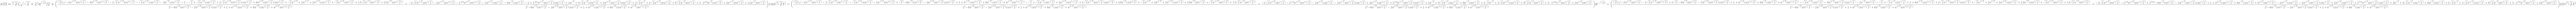

In [75]:
from sympy import init_printing, Function, dsolve, symbols, var, lambdify, Eq
import numpy as np
init_printing()


t = symbols('t')
var('C1 C2 C3 C4')
x = Function('x')
y = Function('y')

eq1 = Eq(x(t).diff('t', 2), x(t) + y(t))
eq2 = Eq(y(t).diff('t', 2), x(t) - y(t))

ics = {x(0): 1, x(t).diff(t).subs(t, 0): 1, y(1): 1, y(t).diff(t).subs(t, 1): 0}
sol = dsolve([eq1, eq2], [x(t), y(t)], ics=ics)
sol[0]

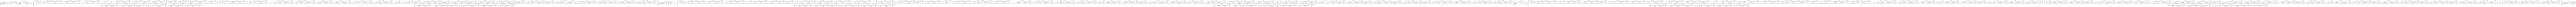

In [76]:
sol[1]

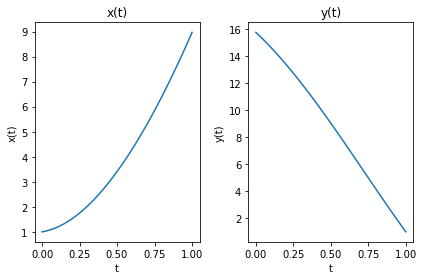

In [77]:
import matplotlib.pyplot as plt


def draw_root(x, y, a=0, b=1, n=100):
    tt = np.linspace(a, b, n)
    xx = lambdify(t, x.rhs, 'numpy')(tt)
    yy = lambdify(t, y.rhs, 'numpy')(tt)
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(tt, xx), ax[0].set_title('x(t)')
    ax[0].set_xlabel('t'), ax[0].set_ylabel('x(t)')
    ax[1].plot(tt, yy), ax[1].set_title('y(t)')
    ax[1].set_xlabel('t'), ax[1].set_ylabel('y(t)')
    plt.tight_layout()
    plt.show()

X, Y = sol[0].subs({'C4': 1}), sol[1].subs({'C4': 1})
draw_root(X, Y)

### –ó–∞–¥–∞–Ω–∏–µ 2

In [72]:
import covid
import pandas as pd
import matplotlib.pyplot as plt


covid_world = covid.Covid(source='worldometers').get_data()
df = pd.DataFrame(covid_world).sort_values(by='total_cases_per_million', ascending=False)
df = df.loc[df['population'] != 0]
df.total_tests = list(map(int, df.total_tests / (df.population / 10**6)))
df = df[['total_cases_per_million', 'total_tests', 'total_deaths_per_million']]
df_s = df.cumsum()
df_s

total_cases_per_million  total_tests total_deaths_per_million
161                  385876      3225589                     1833
110                  710215      4929682                     5771
185                 1031898     18902837                     8740
157                 1345124     18902837                    10110
186                 1649169     22267191                    13136
..                      ...          ...                      ...
225                18296079    318365520                   215445
223                18296095    318365520                   215447
227                18296110    318365520                   215447
229                18296119    318365520                   215447
230                18296128    318365520                   215447

[222 rows x 3 columns]

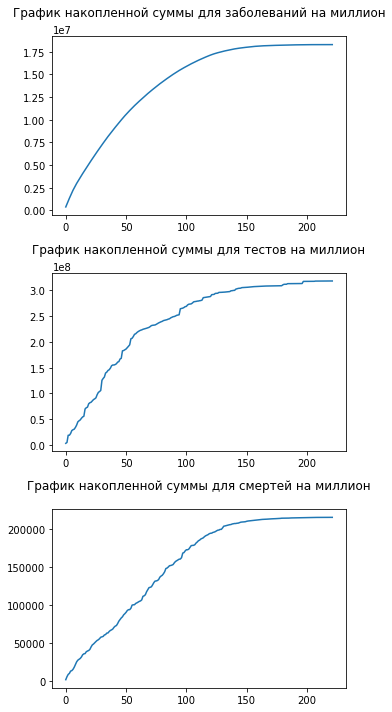

In [73]:
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.set_title('–ì—Ä–∞—Ñ–∏–∫ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–π —Å—É–º–º—ã –¥–ª—è –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π –Ω–∞ –º–∏–ª–ª–∏–æ–Ω', pad=20)
ax2.set_title('–ì—Ä–∞—Ñ–∏–∫ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–π —Å—É–º–º—ã –¥–ª—è —Ç–µ—Å—Ç–æ–≤ –Ω–∞ –º–∏–ª–ª–∏–æ–Ω', pad=20)
ax3.set_title('–ì—Ä–∞—Ñ–∏–∫ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–π —Å—É–º–º—ã –¥–ª—è —Å–º–µ—Ä—Ç–µ–π –Ω–∞ –º–∏–ª–ª–∏–æ–Ω', pad=20)
ax1.plot(range(len(df_s)), df_s.total_cases_per_million)
ax2.plot(range(len(df_s)), df_s.total_tests)
ax3.plot(range(len(df_s)), df_s.total_deaths_per_million)
plt.tight_layout()
plt.show()